# Linear regression

Linear regression in Python can be done in different ways. From coding it yourself to using a function from a statistics module.

Here we will do both.

## Coding with numpy
From the [Wikipedia](http://en.wikipedia.org/wiki/Simple_linear_regression), we see that linear regression can be expressed as:
$$
y = \alpha + \beta x
$$
where:
$$
\beta = \frac{\overline{xy} -\bar x \bar y}{\overline{x^2} - \bar{x}^2}=\frac{\mathrm{Cov}[x,y]}{\mathrm{Var}[x]}
$$
and $\alpha=\overline y - \beta \bar x$

We first import the basic modules and generate some data with noise.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

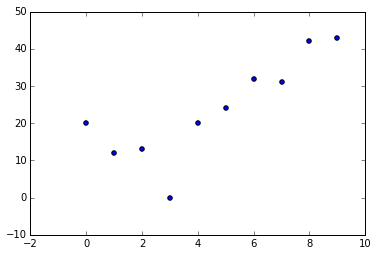

In [5]:
x = np.arange(10.)
y = 5*x+3
np.random.seed(3)
y+= np.random.normal(scale=10,size=x.size)
plt.scatter(x,y);

In [6]:
def lin_reg(x,y):
    """
    Perform a linear regression of x vs y.
    x, y are 1 dimensional numpy arrays
    returns alpha and beta for the model y = alpha + beta*x
    """
    beta = np.mean(x*y)-np.mean(x)*np.mean(y)
    beta /= np.mean(x**2)-np.mean(x)**2
    alpha = np.mean(y)-beta*np.mean(x)
    return alpha, beta

lin_reg(x,y)

(7.1454545454545411, 3.6787878787878796)

We could also implement it with the numpy covariance function. The diagonal terms represent the variance.

In [9]:
def lin_reg2(x,y):
    """
    Perform a linear regression of x vs y. Uses covariances.
    x, y are 1 dimensional numpy arrays
    returns alpha and beta for the model y = alpha + beta*x
    """
    c = np.cov(x,y)
    beta = c[0,1]/c[0,0]
    alpha = np.mean(y)-beta*np.mean(x)
    return alpha, beta

lin_reg2(x,y)

(7.1454545454545446, 3.6787878787878787)

## Coding as a least square problem

The previous methods only works for single variables. We could generalize it if we code it as a [least square problem](http://en.wikipedia.org/wiki/Linear_least_squares_%28mathematics%29):
$$
\bf y = \bf A \boldsymbol \beta
$$
Remark that $\bf A$ is $\bf X$ with an extra column to represent independent term, previously called $\alpha$, that now corresponds to $\beta_{N+1}$.
$$
\bf A = \left[\bf X , \bf 1 \right]
$$

In [10]:
def lin_reg3(x,y):
    """
    Perform a linear regression of x vs y. Uses least squares.
    x, y are 1 dimensional numpy arrays
    returns alpha and beta for the model y = alpha + beta*x
    """
    A = np.vstack([x,np.ones_like(x)])
    return np.linalg.lstsq(A.T,y)[0]

lin_reg3(x,y)

array([ 3.67878788,  7.14545455])

## The simple ways
### numpy

As usual, for tasks as common as a linear regression, there are already implemented solutions in several packages. In numpy, we can use polyfit, which can fit polinomial of degree $N$. 

In [11]:
np.polyfit(x,y, 1)

array([ 3.67878788,  7.14545455])

### scipy

scipy has a [statistics module](http://docs.scipy.org/doc/scipy-0.14.0/reference/stats.html) that returns the fit and the correlation coefficient:

In [12]:
import scipy.stats as stats

In [13]:
alpha, beta, r, *__ = stats.linregress(x,y)
alpha, beta, r

(3.6787878787878792, 7.1454545454545446, 0.81763690029241587)

### scikit-learn

The most powerful module for doing data analysis, and Machine Learning is [scikit-learn](http://scikit-learn.org/stable/index.html). There is a [good documentation on linear models](http://scikit-learn.org/stable/modules/linear_model.html)

In [63]:
from sklearn import linear_model

In [64]:
clf = linear_model.LinearRegression()

In [68]:
clf.fit(x[:, np.newaxis], y)

LinearRegression(copy_X=True, fit_intercept=True, normalize=False)

In [73]:
clf.coef_, clf.intercept_

(array([ 4.58787879]), 9.0545454545454511)

## Efficiency

As an exercice test the speed of these implementation for a larger dataset.